`We Will Analysis our Dataset to understand much better`

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('../Dataset/India.csv')
print(df.shape)
df.head(n=5)

(360, 29)


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,positive_rate,tests_per_case,tests_units,new_vaccinations_smoothed_per_million,population,population_density,median_age,aged_65_older,aged_70_older,life_expectancy
0,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
1,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
2,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
3,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
4,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66


In [3]:
df.isnull().sum()

date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
total_tests                               57
new_tests                                 64
total_tests_per_thousand                  57
new_tests_per_thousand                    64
new_tests_smoothed                        51
new_tests_smoothed_per_thousand           51
positive_rate                             52
tests_per_case                            52
tests_units                               44
new_vaccin

In [4]:
# Handle Nan Values

df['new_cases'] = df.new_cases.fillna(0.0)
df['new_cases_smoothed'] = df.new_cases_smoothed.fillna(0.0)

df['new_deaths'] = df.new_deaths.fillna(0.0)
df['new_deaths_smoothed'] = df.new_deaths_smoothed.fillna(0.0)

df['new_cases_per_million'] = df.new_cases_per_million.fillna(0.0)
df['new_cases_smoothed_per_million'] = df.new_cases_smoothed_per_million.fillna(0.0)

df['total_deaths'] = df.total_deaths.fillna(0.0)

df.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,positive_rate,tests_per_case,tests_units,new_vaccinations_smoothed_per_million,population,population_density,median_age,aged_65_older,aged_70_older,life_expectancy
0,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
1,2020-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
2,2020-02-01,1.0,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
3,2020-02-02,2.0,1.0,0.0,0.0,0.0,0.0,0.001,0.001,0.0,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66
4,2020-02-03,3.0,1.0,0.0,0.0,0.0,0.0,0.002,0.001,0.0,...,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,69.66


#### New Cases || New Cases Smoothed

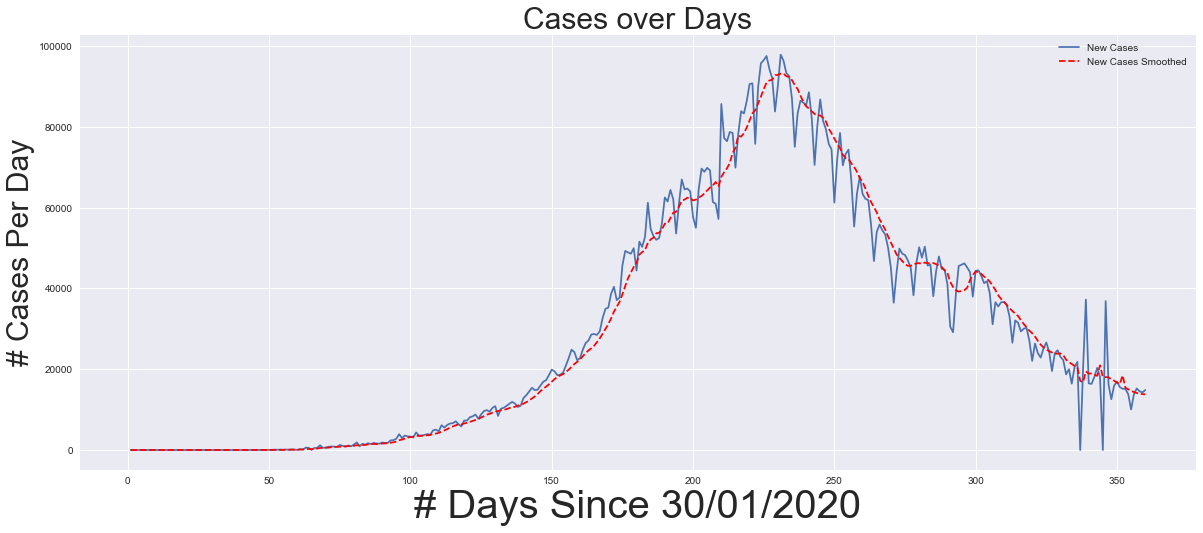

In [5]:
x = np.arange(1,df.shape[0]+1)

plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,list(df.new_cases), label='New Cases')
plt.plot(x,list(df.new_cases_smoothed), label='New Cases Smoothed', linestyle='dashed', color='red')
plt.xlabel('# Days Since 30/01/2020',fontsize = 40)
plt.ylabel('# Cases Per Day', fontsize=30)
plt.title('Cases over Days', fontsize=30)
plt.legend()
plt.show()

#### New Cases Per Milion || New Cases Per Million Smoothed

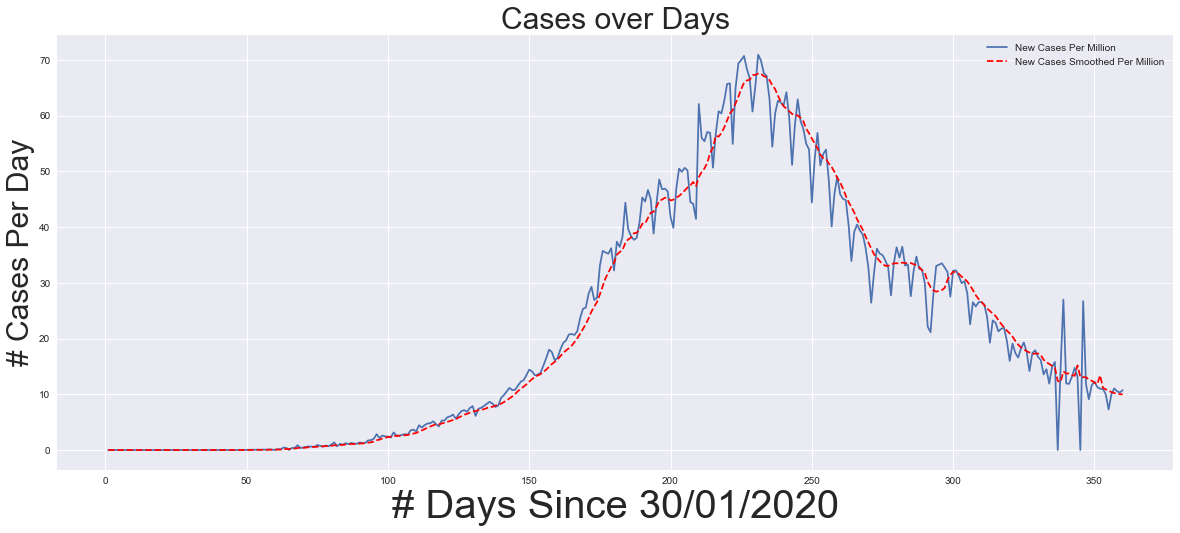

In [6]:
x = np.arange(1,df.shape[0]+1)

plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,list(df.new_cases_per_million), label='New Cases Per Million')
plt.plot(x,list(df.new_cases_smoothed_per_million), label='New Cases Smoothed Per Million', linestyle='dashed', color='red')
plt.xlabel('# Days Since 30/01/2020',fontsize = 40)
plt.ylabel('# Cases Per Day', fontsize=30)
plt.title('Cases over Days', fontsize=30)
plt.legend()
plt.show()

#### New Deaths || New Deaths Smoothed

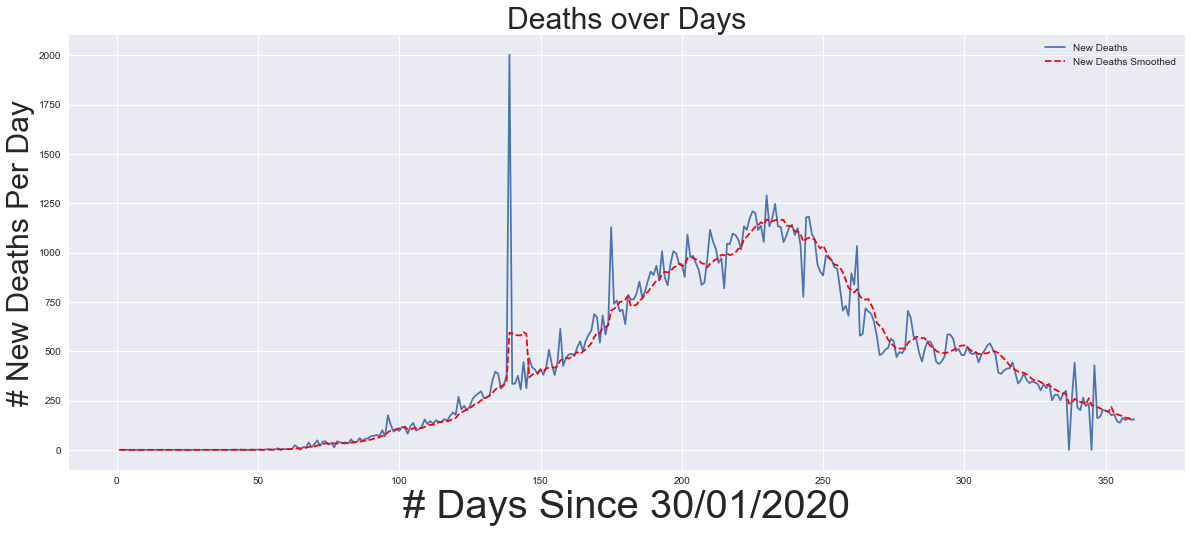

In [7]:
x = np.arange(1,df.shape[0]+1)

plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,list(df.new_deaths), label='New Deaths')
plt.plot(x,list(df.new_deaths_smoothed), label='New Deaths Smoothed', linestyle='dashed', color='red')
plt.xlabel('# Days Since 30/01/2020',fontsize = 40)
plt.ylabel('# New Deaths Per Day', fontsize=30)
plt.title('Deaths over Days', fontsize=30)
plt.legend()
plt.show()

#### Total Cases || Total Deaths

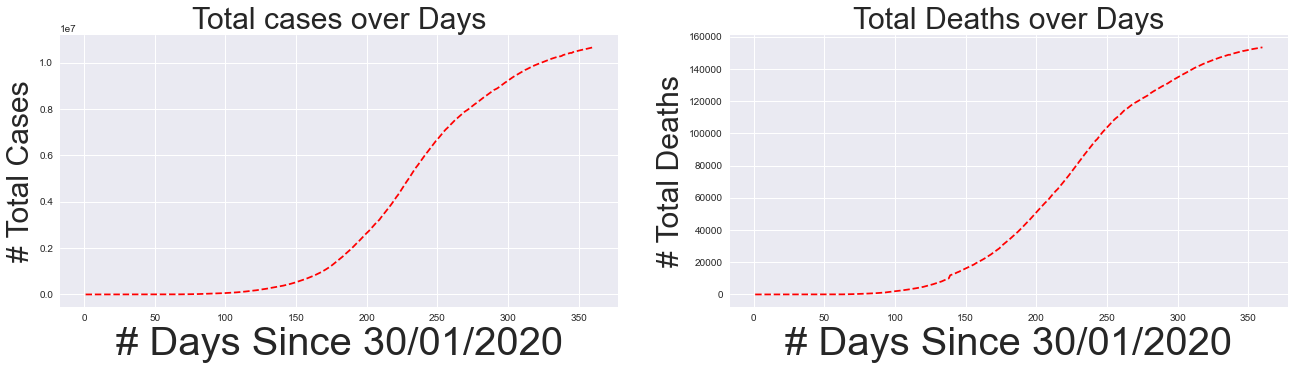

In [8]:
x = np.arange(1,df.shape[0]+1)

fig,ax = plt.subplots(1,2,figsize=(22,5))

ax[0].plot(x,list(df.total_cases), linestyle='dashed', color='red')
ax[0].set_xlabel('# Days Since 30/01/2020',fontsize = 40)
ax[0].set_ylabel('# Total Cases', fontsize=30)
ax[0].set_title('Total cases over Days', fontsize=30)

ax[1].plot(x,list(df.total_deaths), linestyle='dashed', color='red')
ax[1].set_xlabel('# Days Since 30/01/2020',fontsize = 40)
ax[1].set_ylabel('# Total Deaths', fontsize=30)
ax[1].set_title('Total Deaths over Days', fontsize=30)
plt.show()